In [1]:
import os

print(os.environ['SPARK_HOME'])

/usr/share/spark


In [41]:
import findspark
findspark.init()
import pyspark
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .master("spark://data1p:7077") \
    .appName("Final-Assignment-Group3-BikeRental") \
    .getOrCreate()

In [4]:
dataset_path="/data/shared/spark/challenge_3/"

In [5]:
# Read in all available data files into a data frame
df = spark.read \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .csv("file://"+dataset_path+"2017*.csv")    

In [6]:
df.printSchema()

root
 |-- Duration (ms): integer (nullable = true)
 |-- Start date: timestamp (nullable = true)
 |-- End date: timestamp (nullable = true)
 |-- Start station number: string (nullable = true)
 |-- Start station: string (nullable = true)
 |-- End station number: string (nullable = true)
 |-- End station: string (nullable = true)
 |-- Bike number: string (nullable = true)
 |-- Member type: string (nullable = true)



In [7]:
df.columns

['Duration (ms)',
 'Start date',
 'End date',
 'Start station number',
 'Start station',
 'End station number',
 'End station',
 'Bike number',
 'Member type']

In [8]:
df.count()

3758207

In [9]:
df.cache

<bound method DataFrame.cache of DataFrame[Duration (ms): int, Start date: timestamp, End date: timestamp, Start station number: string, Start station: string, End station number: string, End station: string, Bike number: string, Member type: string]>

In [10]:
pd_df=df.toPandas()

In [13]:
pd_df

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,197068,2017-10-01 00:00:02,2017-10-01 00:03:19,31214,17th & Corcoran St NW,31229,New Hampshire Ave & T St NW,W21022,Member
1,434934,2017-10-01 00:00:23,2017-10-01 00:07:38,31104,Adams Mill & Columbia Rd NW,31602,Park Rd & Holmead Pl NW,W00470,Member
2,955437,2017-10-01 00:00:56,2017-10-01 00:16:52,31221,18th & M St NW,31103,16th & Harvard St NW,W20206,Member
3,461619,2017-10-01 00:00:56,2017-10-01 00:08:37,31111,10th & U St NW,31102,11th & Kenyon St NW,W21014,Member
4,3357184,2017-10-01 00:00:59,2017-10-01 00:56:56,31260,23rd & E St NW,31260,23rd & E St NW,W22349,Casual
5,2235414,2017-10-01 00:01:06,2017-10-01 00:38:21,31260,23rd & E St NW,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,W21107,Casual
6,1177391,2017-10-01 00:01:14,2017-10-01 00:20:51,31603,1st & M St NE,31259,20th St & Virginia Ave NW,W00708,Casual
7,470153,2017-10-01 00:01:19,2017-10-01 00:09:09,31285,22nd & P ST NW,31201,15th & P St NW,W22460,Member
8,549673,2017-10-01 00:02:01,2017-10-01 00:11:10,31102,11th & Kenyon St NW,31503,Florida Ave & R St NW,W00875,Member
9,481637,2017-10-01 00:03:08,2017-10-01 00:11:10,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00492,Member


#### Load weather data

pending: 

1) Need to drop column site and source thar are always the same value

2) Check the names of the columns. Data-names has only 10 and we have 11 columns in weather-daily.

In [12]:
df2 = spark.read \
    .option("inferSchema", "true") \
    .csv("file://"+dataset_path+"weather_data_daily.csv")
    
features=[ "Site4","Date","Source", 
            "Max Temp","Avg Temp","HDDs", \
            "CDDs","Precipitation", \
            "Snowfall","Snow/Ice"]
#target=["median_value"]

fieldnames=features #+target

rawnames=df2.schema.names

# Create a small function
def updateColNames(df,oldnames,newnames):
    for i in range(len(newnames)):
        df=df.withColumnRenamed(oldnames[i], newnames[i])
    return df

df2=updateColNames(df2,rawnames,fieldnames)

df2.printSchema()

root
 |-- Site4: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Max Temp: integer (nullable = true)
 |-- Avg Temp: integer (nullable = true)
 |-- HDDs: double (nullable = true)
 |-- CDDs: double (nullable = true)
 |-- Precipitation: double (nullable = true)
 |-- Snowfall: double (nullable = true)
 |-- Snow/Ice: double (nullable = true)
 |-- _c10: double (nullable = true)



In [18]:
pd_df2=df2.toPandas()


,Site4,Date,Source,Max Temp,Avg Temp,HDDs,CDDs,Precipitation,Snowfall,Snow/Ice,_c10
0,KIAD,1/1/2010 0:00:00,NCDC,43,28,35.5,29.5,0.0,0.0000,0.000,0.00
1,KIAD,1/2/2010 0:00:00,NCDC,28,18,23.0,42.0,0.0,0.0000,0.000,0.00
2,KIAD,1/3/2010 0:00:00,NCDC,26,14,20.0,45.0,0.0,0.0000,0.000,0.00
3,KIAD,1/4/2010 0:00:00,NCDC,32,21,26.5,38.5,0.0,0.0000,0.000,0.00
4,KIAD,1/5/2010 0:00:00,NCDC,35,27,31.0,34.0,0.0,0.0000,0.000,0.00
5,KIAD,1/6/2010 0:00:00,NCDC,37,28,32.5,32.5,0.0,0.0001,0.001,0.00
6,KIAD,1/7/2010 0:00:00,NCDC,37,28,32.5,32.5,0.0,0.0100,0.200,0.00
7,KIAD,1/8/2010 0:00:00,NCDC,32,22,27.0,38.0,0.0,0.0500,1.000,1.00
8,KIAD,1/9/2010 0:00:00,NCDC,36,22,29.0,36.0,0.0,0.0000,0.000,0.00
9,KIAD,1/10/2010 0:00:00,NCDC,31,19,25.0,40.0,0.0,0.0000,0.000,0.00


In [26]:
pd_df2=pd_df2[['Date','Max Temp','Avg Temp']]

#### Merge weather_data and trip_history_data

Pending:
1) need to add the new columns into each dataset
2) add the weather stats for each day

In [20]:
pd_df['sdate'] = [d.date() for d in pd_df['Start date']]

In [21]:
pd_df

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,sdate,stime
0,197068,2017-10-01 00:00:02,2017-10-01 00:03:19,31214,17th & Corcoran St NW,31229,New Hampshire Ave & T St NW,W21022,Member,2017-10-01,00:00:02
1,434934,2017-10-01 00:00:23,2017-10-01 00:07:38,31104,Adams Mill & Columbia Rd NW,31602,Park Rd & Holmead Pl NW,W00470,Member,2017-10-01,00:00:23
2,955437,2017-10-01 00:00:56,2017-10-01 00:16:52,31221,18th & M St NW,31103,16th & Harvard St NW,W20206,Member,2017-10-01,00:00:56
3,461619,2017-10-01 00:00:56,2017-10-01 00:08:37,31111,10th & U St NW,31102,11th & Kenyon St NW,W21014,Member,2017-10-01,00:00:56
4,3357184,2017-10-01 00:00:59,2017-10-01 00:56:56,31260,23rd & E St NW,31260,23rd & E St NW,W22349,Casual,2017-10-01,00:00:59
5,2235414,2017-10-01 00:01:06,2017-10-01 00:38:21,31260,23rd & E St NW,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,W21107,Casual,2017-10-01,00:01:06
6,1177391,2017-10-01 00:01:14,2017-10-01 00:20:51,31603,1st & M St NE,31259,20th St & Virginia Ave NW,W00708,Casual,2017-10-01,00:01:14
7,470153,2017-10-01 00:01:19,2017-10-01 00:09:09,31285,22nd & P ST NW,31201,15th & P St NW,W22460,Member,2017-10-01,00:01:19
8,549673,2017-10-01 00:02:01,2017-10-01 00:11:10,31102,11th & Kenyon St NW,31503,Florida Ave & R St NW,W00875,Member,2017-10-01,00:02:01
9,481637,2017-10-01 00:03:08,2017-10-01 00:11:10,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00492,Member,2017-10-01,00:03:08


In [29]:
import pandas as pd
pd_df2['Date'] =pd_df2.Date.apply(pd.to_datetime)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
pd_df2['Date'] = [d.date() for d in pd_df2['Date']]

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
pd_df2

,Date,Max Temp,Avg Temp
0,2010-01-01,43,28
1,2010-01-02,28,18
2,2010-01-03,26,14
3,2010-01-04,32,21
4,2010-01-05,35,27
5,2010-01-06,37,28
6,2010-01-07,37,28
7,2010-01-08,32,22
8,2010-01-09,36,22
9,2010-01-10,31,19


In [105]:
bike_trips=pd_df.merge(pd_df2, left_on='sdate', right_on='Date', how='left')

In [106]:
bike_trips['month']=pd.to_datetime(bike_trips.Date).dt.month

In [107]:
bike_trips['DayofWeek']=pd.to_datetime(bike_trips.Date).dt.dayofweek

In [108]:
bike_trips['Start_hour']=bike_trips['Start date'].dt.hour

In [109]:
bike_trips['End_hour']=bike_trips['End date'].dt.hour

In [111]:
bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3758207 entries, 0 to 3758206
Data columns (total 18 columns):
Duration (ms)           int64
Start date              datetime64[ns]
End date                datetime64[ns]
Start station number    object
Start station           object
End station number      object
End station             object
Bike number             object
Member type             object
sdate                   object
stime                   object
Date                    object
Max Temp                int64
Avg Temp                int64
month                   int64
DayofWeek               int64
Start_hour              int64
End_hour                int64
dtypes: datetime64[ns](2), int64(7), object(9)
memory usage: 544.8+ MB


Number of rides per member Type

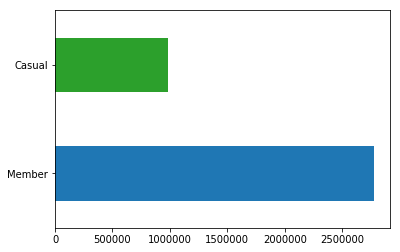

In [57]:
palette=[sns.color_palette()[0],sns.color_palette()[2],sns.color_palette()[1]]
bike_trips['Member type'].value_counts().plot(kind='barh', color=palette)

Number of Rides per month

/usr/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


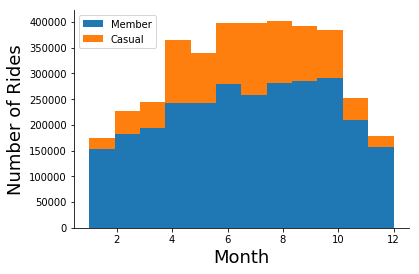

In [62]:
hist1=bike_trips[bike_trips['Member type'] == 'Member'].month
hist2=bike_trips[bike_trips['Member type'] == 'Casual'].month


n,b,p=plt.hist([hist1, hist2], stacked=True,range=[1,12], bins=12)
plt.legend(['Member','Casual'],loc=0)

plt.xlabel('Month', fontsize=18)
plt.ylabel('Number of Rides', fontsize=18)
sns.despine()

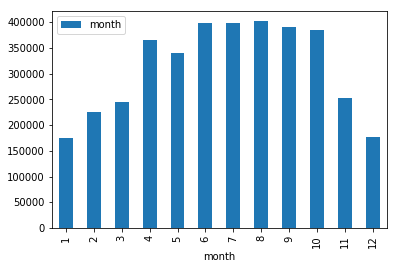

In [95]:
bike_trips[['month']].groupby(bike_trips.month).count().plot(kind="bar")

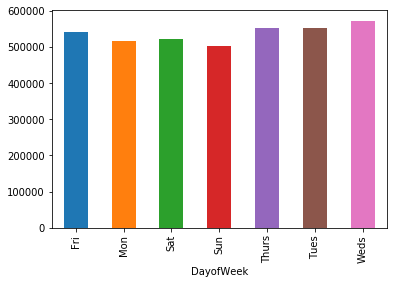

In [101]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
bike_trips['DayofWeek'].groupby(bike_trips.DayofWeek.map(days)).count().plot.bar()


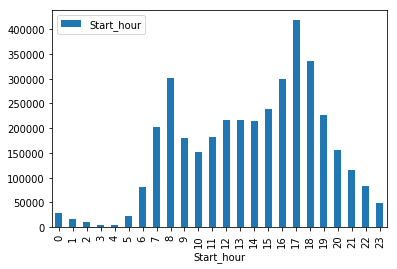

In [124]:
bike_trips[['Start_hour']].groupby(bike_trips.Start_hour).count().plot(kind="bar")

Average duration per station

Stations Map

# Transform Dataset for Modeling

In [ ]:
df.groupby('Company Name').agg({'Amount': ['sum','count']})

In [134]:
bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3758207 entries, 0 to 3758206
Data columns (total 18 columns):
Duration (ms)           int64
Start date              datetime64[ns]
End date                datetime64[ns]
Start station number    object
Start station           object
End station number      object
End station             object
Bike number             object
Member type             object
sdate                   object
stime                   object
Date                    object
Max Temp                int64
Avg Temp                int64
month                   int64
DayofWeek               int64
Start_hour              int64
End_hour                int64
dtypes: datetime64[ns](2), int64(7), object(9)
memory usage: 704.8+ MB


In [142]:
bike_trips_ml=bike_trips.groupby(['Date','month','DayofWeek','Avg Temp']).agg({'sdate': 'count', 'Duration (ms)': 'sum'})

In [144]:
bike_trips_ml=bike_trips_ml.rename(columns = {'sdate':'Ntrips'})

In [145]:
bike_trips_ml

,,,,Ntrips,Duration (ms)
Date,month,DayofWeek,Avg Temp,,
2017-01-01,1,6,33,4064,5885529655
2017-01-02,1,0,39,1640,1321223048
2017-01-03,1,1,41,3774,2758929473
2017-01-04,1,2,29,7186,5969017516
2017-01-05,1,3,23,6216,4403922454
2017-01-06,1,4,24,5572,3774810202
2017-01-07,1,5,16,1809,1315921811
2017-01-08,1,6,11,1920,1230772519
2017-01-09,1,0,7,4618,2878176571
